# library import

In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# data loading

In [3]:
filename_data = './satisfaction_data.csv'
#data = np.genfromtxt(filename_data, encoding = 'ascii', names=('age', 'workclass', 'fnlwgt', 'educational_num', 'marital_status', 'hours_per_week', 'satisfaction'), delimiter =',', dtype = None)
data_feature = np.loadtxt(filename_data, delimiter =',',usecols= (0,1,2,3,4,5), dtype=int)
data_class = np.loadtxt(filename_data, delimiter =',',usecols= (6), dtype='str')
number_data = data_feature.shape[0]

#genfromtext를 전 영역에 대해서 쓰니까 string 값들이 nan으로 나온다..
#여기서 nan이란 not a number 라는 뜻.
#dtype을 float64로 가져와서 발생하는 현상.
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=radii26omg&logNo=221051465120

#print('number of data = ', number_data)
#print(data_feature.shape)
#print(data_feature[0].dtype)
#print(data_class.shape)


# data inspection

In [4]:
minmax = np.empty((6,2), float)

for i in range(6):
    print("data_col_"+str(i))
    minmax[i][0] = np.min(data_feature, axis=0)[i]
    print("min:"+str(minmax[i][0]))
    minmax[i][1] = np.max(data_feature, axis=0)[i]
    print("max:"+str(minmax[i][1]))
    print("mean:"+str(np.mean(data_feature, axis=0)[i]))
    print("var:"+str(np.var(data_feature, axis=0)[i]))
    print("")
print(minmax)


data_col_0
min:1.0
max:99.0
mean:43.22015
var:140.24748397747882

data_col_1
min:0.0
max:5.0
mean:2.3586
var:1.2923060399996893

data_col_2
min:0.0
max:2.0
mean:1.1708
var:0.31852736000004944

data_col_3
min:13769.0
max:1097453.0
mean:184706.98085
var:10226020824.74352

data_col_4
min:17.0
max:90.0
mean:39.4344
var:165.8094966400004

data_col_5
min:1.0
max:16.0
mean:10.30435
var:6.026421077499933

[[1.000000e+00 9.900000e+01]
 [0.000000e+00 5.000000e+00]
 [0.000000e+00 2.000000e+00]
 [1.376900e+04 1.097453e+06]
 [1.700000e+01 9.000000e+01]
 [1.000000e+00 1.600000e+01]]


# Normalization

In [5]:
# 거리를 구할 때 유클리드 거리 (l2 norm)으로 구할 예정
# 한 요소가 너무 커버리면 그 요소에 다른게 trivial 해진다.
# normalization을 해주자.
normalized = np.empty((20000,6))
#print(normalized.shape[1])
for i in range(normalized.shape[1]):
    normalized[:, i] = (data_feature[:, i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
print(normalized)


[[0.39795918 0.4        0.5        0.06745786 0.10958904 0.53333333]
 [0.39795918 0.4        0.5        0.22659188 0.50684932 0.6       ]
 [0.39795918 0.4        0.5        0.22427571 0.35616438 0.86666667]
 ...
 [0.39795918 0.4        0.5        0.15553796 0.20547945 0.26666667]
 [0.39795918 0.6        0.5        0.03829806 0.4109589  0.6       ]
 [0.5        0.8        0.5        0.04785066 0.24657534 0.8       ]]


# augment feature and class data

In [6]:
data_augmented = np.concatenate((normalized, data_class.reshape(20000, 1)), axis = 1)
#print(data_augmented)
#print(data_augmented)
#print(data_augmented[0][6].dtype)

#unsatisfied 는 0으로, satisfied는 1로 바꾼다.
np.putmask(data_augmented, data_augmented == 'satisfied', 1)
np.putmask(data_augmented, data_augmented == 'unsatisfied', 0)
#print(data_augmented[0])
#print(data_augmented[2])
#print(data_augmented[0][0].dtype)

# KNN
## train data set, test data set separation

In [7]:
#샘플 인덱스들의 배열
#sample_train = np.empty((0,2000), int)

#for i in range(10):
#    sample_train = np.append(sample_train, np.random.choice(20000, 2000, replace=False).reshape(1, 2000), axis=0)
#    print(sample_train[i])
#print(sample_train.shape)


#데이터의 총 개수는 20000개로, 1:9로 나누면 2000, 18000이다
#훈련데이터에 사용할 데이터를 18000, 테스트에 사용할 데이터를 2000개로 설정하자.
#0~19999의 숫자 중에서 2000개를 샘플링한다.


#무작위로 배열하고 2000:18000으로 split하는게 나을 듯..
#print(data_feature.shape)
# sample_train_x = np.empty((10, 18000, 6), np.uint64)
# sample_train_y = np.empty((10, 18000, 1), np.uint64)
# sample_test_x = np.empty((10, 2000, 6), np.uint64)
# sample_test_y = np.empty((10, 2000, 1), np.uint64)
#data_feature_mixed = np.random.permutation(data_feature)
#print(data_feature_mixed)

sample_train_x = np.empty((10, 18000, 6))
sample_train_y = np.empty((10, 18000, 1))
sample_test_x = np.empty((10, 2000, 6))
sample_test_y = np.empty((10, 2000, 1))

for i in range(10):
    data_augmented_mixed = np.random.permutation(data_augmented).reshape(1, 20000, 7)
    #print(data_augmented_mixed[0][0][6])
    sample_train_x[i], sample_test_x[i] = data_augmented_mixed[0, 2000:, :6], data_augmented_mixed[0, :2000, :6]
    sample_train_y[i], sample_test_y[i] = data_augmented_mixed[0, 2000:, 6].reshape(1, 18000, 1), data_augmented_mixed[0, :2000, 6].reshape(1, 2000, 1)
print(data_augmented_mixed.shape)
#print(sample_train.shape)
#print(sample_test.shape)
#print(sample_train)
print(sample_train_x[0])
#print(sample_test_x[0])
print(sample_train_y[0])
#print(sample_test_y[0])

(1, 20000, 7)
[[0.60204082 0.8        0.5        1.         0.34246575 0.8       ]
 [0.39795918 0.4        1.         0.21794914 0.09589041 0.6       ]
 [0.80612245 0.8        0.5        0.18397522 0.42465753 0.53333333]
 ...
 [0.5        0.4        0.5        0.20686289 0.28767123 0.93333333]
 [0.5        0.4        0.5        0.08945781 0.2739726  0.53333333]
 [0.47959184 0.4        0.5        0.08649569 0.35616438 0.8       ]]
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


## compute distance > 2for loops

In [8]:
# 입력으로 들어오는 feature에 대해서 각각의 요소에 대해 거리를 구한다. 
# feature에 들어있는 모든 요소는 정수형이기 때문에 거리를 구할 수 있다.

number_train = sample_train_x.shape[1]
number_test = sample_test_x.shape[1]
euclid_dists = np.zeros((number_test, number_train))
#print(number_train, number_test)
#print(sample_train_x[0][0])
#print(sample_test_x[0][0])
#print(np.square(sample_train_x[0][0] - sample_test_x[0][0]))
#print(np.sum(np.square(sample_train_x[0][0] - sample_test_x[0][0])))
#print(np.sqrt(np.sum(np.square(sample_train_x[0][0] - sample_test_x[0][0]))))

# RuntimeWarning: invalid value encountered in sqrt
# 루트를 계산하는데 음수가 나오는 경우에 주로 발생
# 설계 상 음수가 나올 수 없음.. 오버플로가 일어남

#print(sample_test_x[0].shape)
#print(sample_train_x[0].shape)

# 바로 l2 norm을 계산하기에는 4번째 요소가 너무 큼.
# >> overflow
# 데이터타입을 np.uint64로 변경
# 또는 normalization을 할 수도?

#for문을 2중 루프로 돌리니 너무 느리다.
#본인 컴퓨터 기준 샘플당 6분 6초
#10개의 샘플을 돌리면 1시간.
# for i in range(number_test):
#     for j in range(number_train):
#         euclid_dists[i, j] = np.sqrt(np.sum(np.square(sample_test_x[0][i] - sample_train_x[0][j])))
# print(euclid_dists)

## compute distance > matrix

In [9]:
#euclid_dist_matrix는
#샘플마다
#각 테스트케이스에 대해서 
#모든 train set에 대한 거리를 저장한다.
euclid_dists_matrix = np.zeros((10, number_test, number_train))
#print(euclid_dists_matrix.shape)

for i in range(10):
    test_matrix = np.sum(np.square(sample_test_x[i]), axis=1).reshape(number_test, 1)
    train_matrix = np.sum(np.square(sample_train_x[i]), axis=1).reshape(1, number_train)
    euclid_dists_matrix[i] = np.sqrt(test_matrix + train_matrix -2*np.dot(sample_test_x[i], sample_train_x[i].T))
print(euclid_dists_matrix.shape)

#print(np.sum(np.square(sample_test_x[0]), axis=1).reshape(number_test, 1).shape)
# (2000, 1)
#print(np.sum(np.square(sample_train_x[0]), axis=1).reshape(1, number_train).shape)
# (1, 18000)
#print(sample_test_x[0].shape)
# (2000, 6)
#print(sample_train_x[i].T.shape)
# (6, 18000)

#이렇게 계산하면 0.4초만에 된다.
#10번하면 5.2초!

(10, 2000, 18000)


## difference between two calculated distance matrix

In [10]:
#TODO: 여기 뭔가 이상함.
#print(np.sum(euclid_dists - euclid_dists_matrix[0]))

## compute prediction

In [11]:
# 과제 참고자료에서 5라고 나옴.
k = [5]
prediction = np.empty((len(k), 10, number_test))
#이렇게 실행하는데..
#knn한 번 실행하는데 약 45초 걸림
#k 가 47일 떄 55초 걸림,
iteration = 0
for k_num in k:
    for i in range(10):
        for j in range(number_test):
            neareast_class = []
            #print(sample_train_y.shape)
            #print(np.argsort(euclid_dists_matrix[i]))
            #print(np.argsort(euclid_dists_matrix[i]).shape)
            
            #argsort는 넘파이 행렬을 인풋으로 받는다.
            #받은 행렬을 오름차순으로 정렬하여,
            #정렬된 요소들의 인덱스를 반환한다.
            #즉, np.argsort(euclid_dists_matrix[i][j]) 부분은
            #i번째 샘플의 j번째 테스트케이스에 대해서 
            #모든 값들을 정렬하고
            #정렬된 요소들의 정렬되기 전 인덱스를 반환한다.
            #즉, j번째 test_x와 가장 가까운 순서부터 먼 순서까지 (오름차순으로 정렬했으므로) 
            #train_x의 인덱스를 반환한다.
            #여기서 k번째까지를 가져와 nearest class에 저장한다.
            neareast_class = sample_train_y[i][np.argsort(euclid_dists_matrix[i][j])][:k_num]
            #print(neareast_class)
            #print(neareast_class.shape)
            #print(neareast_class[0].dtype)

            #저장 형식을 갖게 지정한다.
            neareast_class = neareast_class.astype(int)
            # print(neareast_class.shape)
            # print(neareast_class)

            #bincount란 non negative integer로 구성된 넘파이 어레이에서
            #각각의 빈도수를 세는데 사용하는 메소드다.
            #0부터 가장 큰 값까지 각각의 발생 빈도수를 체크한다.
            #정답 클래스는 0(unsatisfied), 1(satisfied) 이므로
            #[n m] (n, m은 0 이상의 정수)를 반환한다.
            #n은 0인 값들의 개수, m은 1인 값들의 개수이다.
            #argmax는 인풋으로 받은 행렬 중에서
            #가장 값이 큰 인덱스를 반환한다.
            #즉, n이 m보다 크다면 n의 인덱스, 0을 반환한다.
            #이 인덱스는 결국 클래스를 나타내게 된다.
            prediction[iteration][i][j] = np.argmax(np.bincount(neareast_class.reshape(k_num, )))
    iteration = iteration + 1
    #print(iteration)

# print(euclid_dists_matrix[0].shape)
# print(euclid_dists_matrix.shape)
# print(sample_train_y[0].shape)
# print(np.argsort(euclid_dists_matrix[0][0]))
# print(sample_train_y[0][np.argsort(euclid_dists_matrix[0][0])][:k].shape)
# print(neareast_class)
# print(neareast_class[0])
# print(neareast_class.shape)
# print(prediction)
# print(prediction.shape)


# compare prediction and real class

In [12]:
#print(sample_test_y[0].shape) 
# (2000, 1)
#print(prediction.reshape(number_test, 1).shape)
# (2000, 1)



# for i in range(10):
#     #print(sample_test_y[i].reshape(2000, ) - prediction[i])
#     isAnswer = sample_test_y[i].reshape(2000, ) - prediction[i]
#     #print(len(isAnswer[isAnswer == 0]))

#     number_correct = len(isAnswer[isAnswer == 0])

#     print("accuracy: "+str((number_correct/number_test)*100))
for k_iter in range(len(k)):
    isAnswer = np.empty((10, 2000))
    #isAnswer에는 정답 - 추정한 클래스 값이 들어가 있다. 
    #즉, 요소가 0일 경우 해당 인덱스는 정답이고, 
    #그 이외의 경우 오답이다.
    isAnswer = sample_test_y - prediction[k_iter].reshape(10, number_test, 1)

    #number_correct에는 각 샘플 별 0인 인덱스의 개수를 저장한다.

    for i in range(10):
        print("k: " + str(k[k_iter])+ "  accuracy: "+str((np.count_nonzero(isAnswer[i] == 0)/number_test)*100))
    
    print("\n")

#print(prediction[0].shape)
#print(sample_test_y[i].shape)
#print(sample_test_y[i].reshape(2000,).shape)
#print(sample_test_y[i].reshape(2000, ) - prediction[i])
#TODO: accuracy를 올리려면? 해밍 거리밖에 없나
#TODO: 결과 <학번>.csv로 만들기
#TODO: 실행파일 만들기
#TODO: 라이브러리 써서 만든 다음 결과 비교하기

k: 5  accuracy: 75.05
k: 5  accuracy: 75.44999999999999
k: 5  accuracy: 76.44999999999999
k: 5  accuracy: 75.1
k: 5  accuracy: 74.15
k: 5  accuracy: 74.8
k: 5  accuracy: 76.95
k: 5  accuracy: 75.2
k: 5  accuracy: 76.64999999999999
k: 5  accuracy: 75.25




# compute by hamming distance

In [13]:
#해밍 거리란 두 벡터간의 공통된 값의 수다.
#비트간 해밍거리는 같아지기 위해서 바꿔야하는 비트의 값이 해밍거리가 된다.
#즉, 해밍거리의 값이 커질 수록 유사도가 낮다고 할 수 있다. 
#해밍거리가 작다 = 유사도가 높다 = 가깝다.
#비트간 해밍거리를 구하기위해서는
#XOR연산을 한 후, 
#1의 개수를 세면 된다.
#여기선 normalization이 필요없기떄문에 그대로 raw값을 사용한다.

data_raw_augmented = np.concatenate((data_feature, data_class.reshape(20000, 1)), axis = 1)
np.putmask(data_raw_augmented, data_raw_augmented == 'satisfied', 1)
np.putmask(data_raw_augmented, data_raw_augmented == 'unsatisfied', 0)
#print(data_raw_augmented)

sample_raw_train_x = np.empty((10, 18000, 6))
sample_raw_train_y = np.empty((10, 18000, 1))
sample_raw_test_x = np.empty((10, 2000, 6))
sample_raw_test_y = np.empty((10, 2000, 1))

for i in range(10):
    data_raw_augmented_mixed = np.random.permutation(data_raw_augmented).reshape(1, 20000, 7)
    #print(data_augmented_mixed[0][0][6])
    sample_raw_train_x[i], sample_raw_test_x[i] = data_raw_augmented_mixed[0, 2000:, :6], data_raw_augmented_mixed[0, :2000, :6]
    sample_raw_train_y[i], sample_raw_test_y[i] = data_raw_augmented_mixed[0, 2000:, 6].reshape(1, 18000, 1), data_raw_augmented_mixed[0, :2000, 6].reshape(1, 2000, 1)

#메모리 초과방지를 위해 타입 지정
subtracted_matrix = np.zeros((10, number_test, number_train, 6), int)
subtracted_logical_xor = np.zeros((10, number_test, number_train, 6), bool)
hamming_dists_matrix = np.zeros((10, number_test, number_train))
#print(euclid_dists_matrix.shape)

#해밍 거리로 변환
#실행하는데,, 1분20초 걸림
for i in range(10):
    subtracted_matrix[i] = sample_raw_test_x[i].reshape(number_test, 1, 6) - sample_raw_train_x[i].reshape(1, number_train, 6)
    subtracted_logical_xor[i] = np.logical_xor(subtracted_matrix[i], 0)
    sameistrue = np.logical_not(subtracted_logical_xor[i])
    hamming_dists_matrix[i] = sameistrue.sum(axis=2)
print(hamming_dists_matrix.shape)

(10, 2000, 18000)


In [14]:
k = [11, 13, 15, 17, 19, 21]
#이렇게 돌리는데 1분40초
prediction_hamming = np.empty((len(k), 10, number_test))

#knn한 번 실행하는데 약 45초 걸림
#k 가 47일 떄 55초 걸림
iteration = 0
for k_num in k:
    for i in range(10):
        for j in range(number_test):
            neareast_class = []
            neareast_class = sample_raw_train_y[i][np.argsort(hamming_dists_matrix[i][j])][:k_num]
            neareast_class = neareast_class.astype(int)
            prediction_hamming[iteration][i][j] = np.argmax(np.bincount(neareast_class.reshape(k_num, )))
    iteration = iteration + 1

for k_iter in range(len(k)):
    isAnswer_hamming = np.empty((10, 2000))
    isAnswer_hamming = sample_raw_test_y - prediction_hamming[k_iter].reshape(10, number_test, 1)

    for i in range(10):
        print("k: " + str(k[k_iter])+ "  accuracy: "+str((np.count_nonzero(isAnswer_hamming[i] == 0)/number_test)*100))
    
    print("\n")

k: 11  accuracy: 51.05
k: 11  accuracy: 56.2
k: 11  accuracy: 57.599999999999994
k: 11  accuracy: 54.6
k: 11  accuracy: 55.95
k: 11  accuracy: 54.65
k: 11  accuracy: 54.400000000000006
k: 11  accuracy: 55.7
k: 11  accuracy: 54.900000000000006
k: 11  accuracy: 54.400000000000006


k: 13  accuracy: 51.449999999999996
k: 13  accuracy: 55.75
k: 13  accuracy: 58.5
k: 13  accuracy: 54.800000000000004
k: 13  accuracy: 55.60000000000001
k: 13  accuracy: 54.75
k: 13  accuracy: 54.50000000000001
k: 13  accuracy: 55.900000000000006
k: 13  accuracy: 54.2
k: 13  accuracy: 54.25


k: 15  accuracy: 52.349999999999994
k: 15  accuracy: 56.39999999999999
k: 15  accuracy: 57.49999999999999
k: 15  accuracy: 54.65
k: 15  accuracy: 55.900000000000006
k: 15  accuracy: 54.6
k: 15  accuracy: 55.60000000000001
k: 15  accuracy: 56.85
k: 15  accuracy: 54.1
k: 15  accuracy: 54.2


k: 17  accuracy: 53.349999999999994
k: 17  accuracy: 55.50000000000001
k: 17  accuracy: 56.55
k: 17  accuracy: 54.449999999999996
k: 17

# sklearn 으로 검증하기

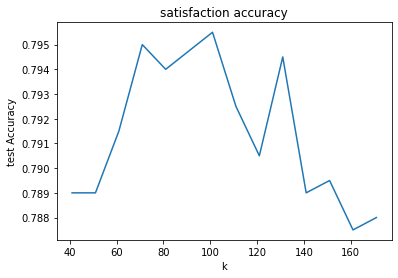

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

sk_data_feature = normalized
sk_data_class = data_class
np.putmask(sk_data_class, sk_data_class == 'satisfied', 1)
np.putmask(sk_data_class, sk_data_class == 'unsatisfied', 0)

sk_train_x, sk_test_x , sk_train_y, sk_test_y = train_test_split(sk_data_feature, sk_data_class, test_size = 0.1, random_state = 100)

#print(len(sk_train_x))
#print(len(sk_test_x))

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(sk_train_x, sk_train_y)
#print(classifier.score(sk_test_x, sk_test_y))

k_list = [41,51,61,71,81,101,111,121,131,141,151,161,171]
#이렇게 돌리는데 11초
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(sk_train_x, sk_train_y)
  accuracies.append(classifier.score(sk_test_x, sk_test_y))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("test Accuracy")
plt.title("satisfaction accuracy")
plt.show()

# save to csv

In [16]:
#print(prediction.shape)
#np.savetxt("20173709.csv", prediction[0][0], fmt='%d', delimiter=',')
#prediction[0]에는
#첫번째 k에 대해서
#10개의 샘플들에 대한
#각각의 테스트 데이터의 예측 결과를 반환.
#print(prediction[0][0].reshape(number_test, 1).shape)
#print(sample_test_y[0].shape)#

#3차원으로 저장이 되어있기 때문에 2차원으로 펼친다.
result_class_prediction = np.empty((number_test, 0), int)
for i in range(10):
    concatenated = np.concatenate((sample_test_y[i], prediction[0][i].reshape(number_test, 1)), axis = 1)
    #print(concatenated.shape)
    result_class_prediction = np.concatenate((result_class_prediction, concatenated), axis = 1)

#print(result_class_prediction.shape)
#print(result_class_prediction)

np.savetxt("20173709.csv", result_class_prediction, fmt='%d', delimiter=',')